<a href="https://colab.research.google.com/github/aditinarayanan/my_prjctcodespace/blob/master/Internshipstudio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1**:**IMPORTING DATASETS AND LIBRARIES**.



In [67]:
#importing datasets and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

#uploading file to colab
from google.colab import files
up=files.upload()

#reading excel file
data=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')
data.head()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (1).xlsx


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [68]:
#finding datatypes
print("Shape= ",data.shape)
print(data.dtypes)

#gives statistical summary
data.describe()


Shape=  (5000, 14)
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


*The shape is 5000 rows and 14 columns*




**STEP 2:Cleaning data**


In [69]:
#looking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

*no null values found*

In [70]:
#finding correlation between age and experience 
ex = data['Experience']
age = data['Age']
correlation = age.corr(ex)
correlation

0.9942148569683321

*We see that the two columns have a high correlation,hence experience column can be dropped,as experience and age are linked*.

In [71]:
#dropping unwanted columns
#also family column might not affect the personal loan column

fl = data['Family']
loan = data['Personal Loan']
correlation = loan.corr(fl)
correlation

data = data.drop(['ID','Experience','Family'],axis=1)
data.head()

,Age,Income,ZIP Code,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,1.6,1,0,0,1,0,0,0
1,45,34,90089,1.5,1,0,0,1,0,0,0
2,39,11,94720,1.0,1,0,0,0,0,0,0
3,35,100,94112,2.7,2,0,0,0,0,0,0
4,35,45,91330,1.0,2,0,0,0,0,0,1


**STEP 3:EDA**



In [72]:
#finding no. of unique values of each column
uniqueValues = data.nunique()
uniqueValues


Age                    45
Income                162
ZIP Code              467
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [73]:
#we see that ZIP code column has a lot of values-it is a noisy signal.It needs to be dropped
data=data.drop(['ZIP Code'],axis=1)
data.head()


,Age,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,1.6,1,0,0,1,0,0,0
1,45,34,1.5,1,0,0,1,0,0,0
2,39,11,1.0,1,0,0,0,0,0,0
3,35,100,2.7,2,0,0,0,0,0,0
4,35,45,1.0,2,0,0,0,0,0,1


In [74]:
#finding number of people with zero mortgage values
zeroMortgage = data['Mortgage'].value_counts()
#converting it to dictionary to find out value of first element since no negative values were observed
d = dict(zeroMortgage)
d[0]


3462

*There are 3462 people with zero mortgage*

In [75]:
#datanew = data.head(20)
#zeroCC = datanew['CCAvg'].value_counts()
#zeroCC

#finding number of people with zero CCAvg
zeroCC = data['CCAvg'].value_counts()
d1=dict(zeroCC)
d1[0]


106

*There are 106 people withzero CCAvg*

In [76]:
#finding value count of each column
#create a list
#cat_count = []
#for col in data.columns:
 #   x = data[col].value_counts()
  #  cat_count.append(x)
#create dataframe from list    
#datafr_counts =pd.DataFrame(cat_count)
#transpose of dataframe
#datafr_counts.T

**Finding value counts of each column separately**

In [77]:
vc1=data['Age'].value_counts()
vc1

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [78]:
vc2=data['Income'].value_counts()
vc2

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

In [79]:
vc3=data['CCAvg'].value_counts()
vc3

0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
           ... 
8.200000      1
5.333333      1
4.666667      1
8.900000      1
9.300000      1
Name: CCAvg, Length: 108, dtype: int64

In [80]:
vc4=data['Education'].value_counts()
vc4

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [81]:
vc5=data['Mortgage'].value_counts()
vc5

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [82]:
vc6=data['Personal Loan'].value_counts()
vc6

0    4520
1     480
Name: Personal Loan, dtype: int64

In [83]:
vc7=data['Securities Account'].value_counts()
vc7

0    4478
1     522
Name: Securities Account, dtype: int64

In [84]:
vc8=data['CD Account'].value_counts()
vc8

0    4698
1     302
Name: CD Account, dtype: int64

In [85]:
vc9=data['Online'].value_counts()
vc9

1    2984
0    2016
Name: Online, dtype: int64

In [86]:
vc9=data['CreditCard'].value_counts()
vc9

0    3530
1    1470
Name: CreditCard, dtype: int64

**STEP 3: UNIVARIATE AND BIVARIATE ANALYSIS**

**Univariate Analysis**

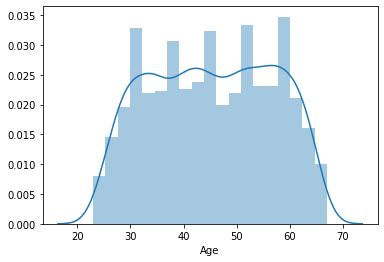

In [87]:
sns.distplot(data['Age'])

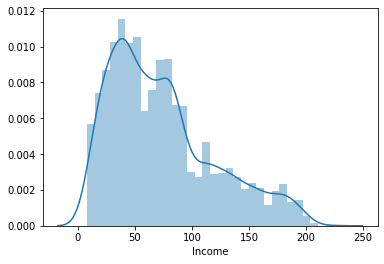

In [88]:
sns.distplot(data['Income'])

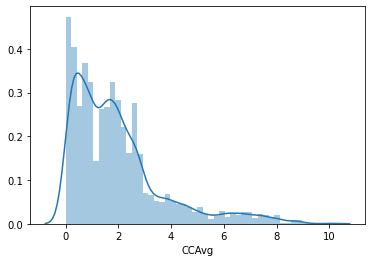

In [89]:
sns.distplot(data['CCAvg'])

*The graph for CCAvg is right skewed*

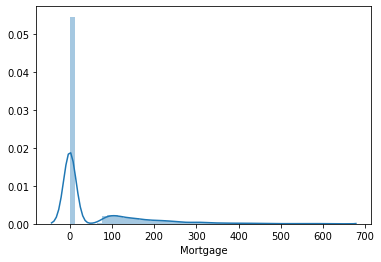

In [90]:
sns.distplot(data['Mortgage'])

*we see that there is a high skew in this graph*.

In [91]:
#Education,pivot table
print(pd.pivot_table(data=data,index='Personal Loan',columns='Education',aggfunc='size'))

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


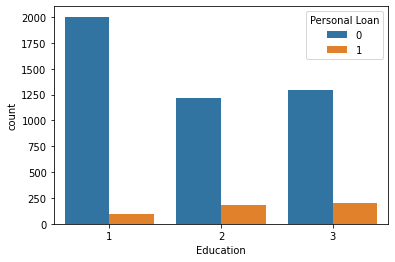

In [92]:
#plotting corresponding graph
sns.countplot(x='Education',data=data,hue='Personal Loan')

*People with higher education level are likely to take personal loan.However between people who take the loan and who don't ,the percentage of those who consider are very low.*

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


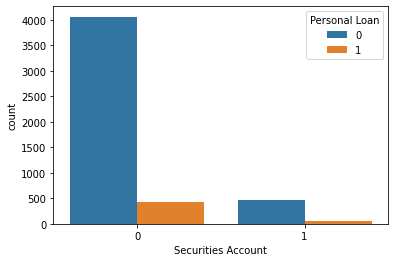

In [93]:
#Plotting countplot for Securities Account.
print(pd.pivot_table(data=data,index='Personal Loan',columns='Securities Account',aggfunc='size'))
sns.countplot(x="Securities Account",data=data,hue="Personal Loan")

*We infer that people who dont have a securities account are more likely not to* *take personal loan and* *only about 12.5% consider for personal loan*.
*Whereas, a very small portiion*,*around 3-4% of people having securities account* *are the ones who take personal loan.*
*Thus, people with or* *without securities account who consider for personal loan* *are a very small percentage.*  

*There are larger number of people who stay alone and they along with people with family memebers 2 are among the least to have accepted the personal loan.*

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


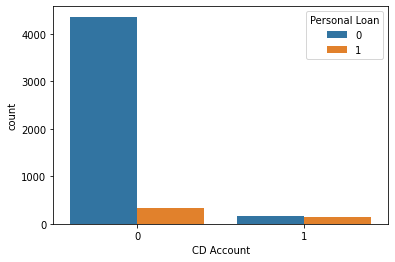

In [94]:
print(pd.pivot_table(data=data,index='Personal Loan',columns='CD Account',aggfunc='size'))
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

*Very few people have CD account and almost 50% of those who have a CD Account,have opted for personal loan.* 

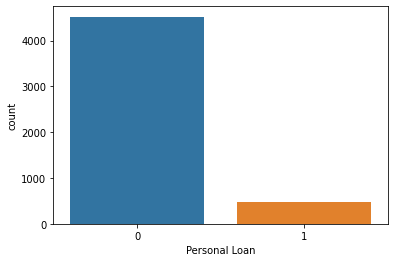

In [95]:
#Personal Loan
sns.countplot(x='Personal Loan',data=data)

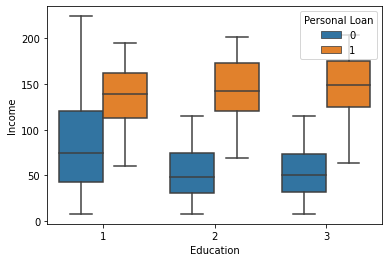

In [96]:
#understanding a boxplot between education and income

sns.boxplot(x="Education",y="Income",data=data,hue="Personal Loan")

*First, notice that there are two sets of boxplots: *o*ne for people who take* *personal loan and one for who don't*. *Boxplots make comparing the measures of* data much more efficient.*    
Inference from box plot:* 
 Education 1 (Under Graduates): Larger number of people with income that's less than 150 will not accpet personal loan.
 Education 2 (Graduates): Larger Number of people with income greater than 100 will accept personal loan.
 Education 3 (Professional): Larger number of people with income greater tha 100 will accept personal loan.
The people of the lower education level and with a low income have not taken personal loan in the previos year. 

*From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage*

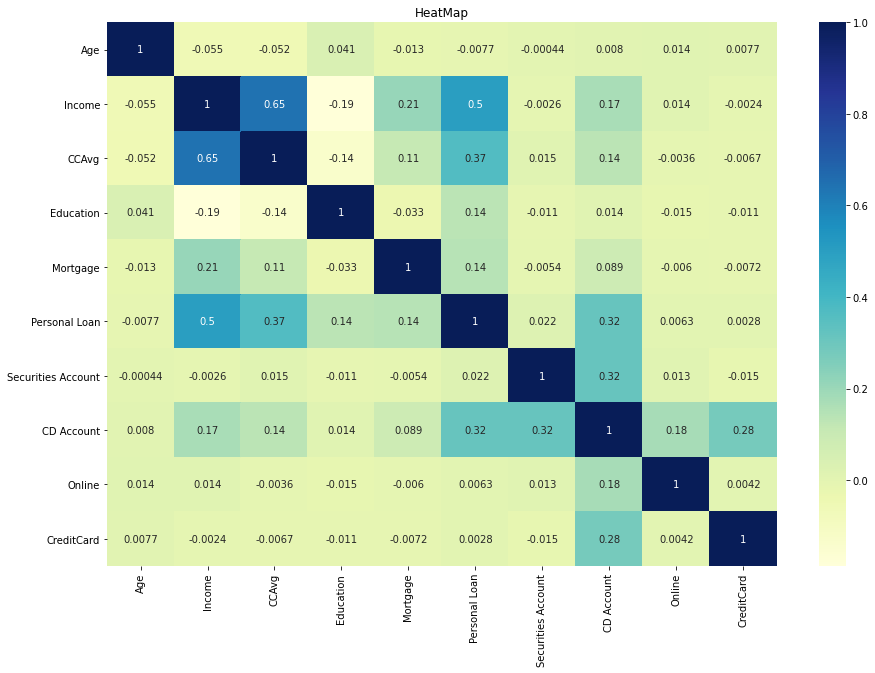

In [97]:
#Plot rectangular data as a color-encoded matrix in the form of heatmap and find correlation between data

fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('HeatMap')
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

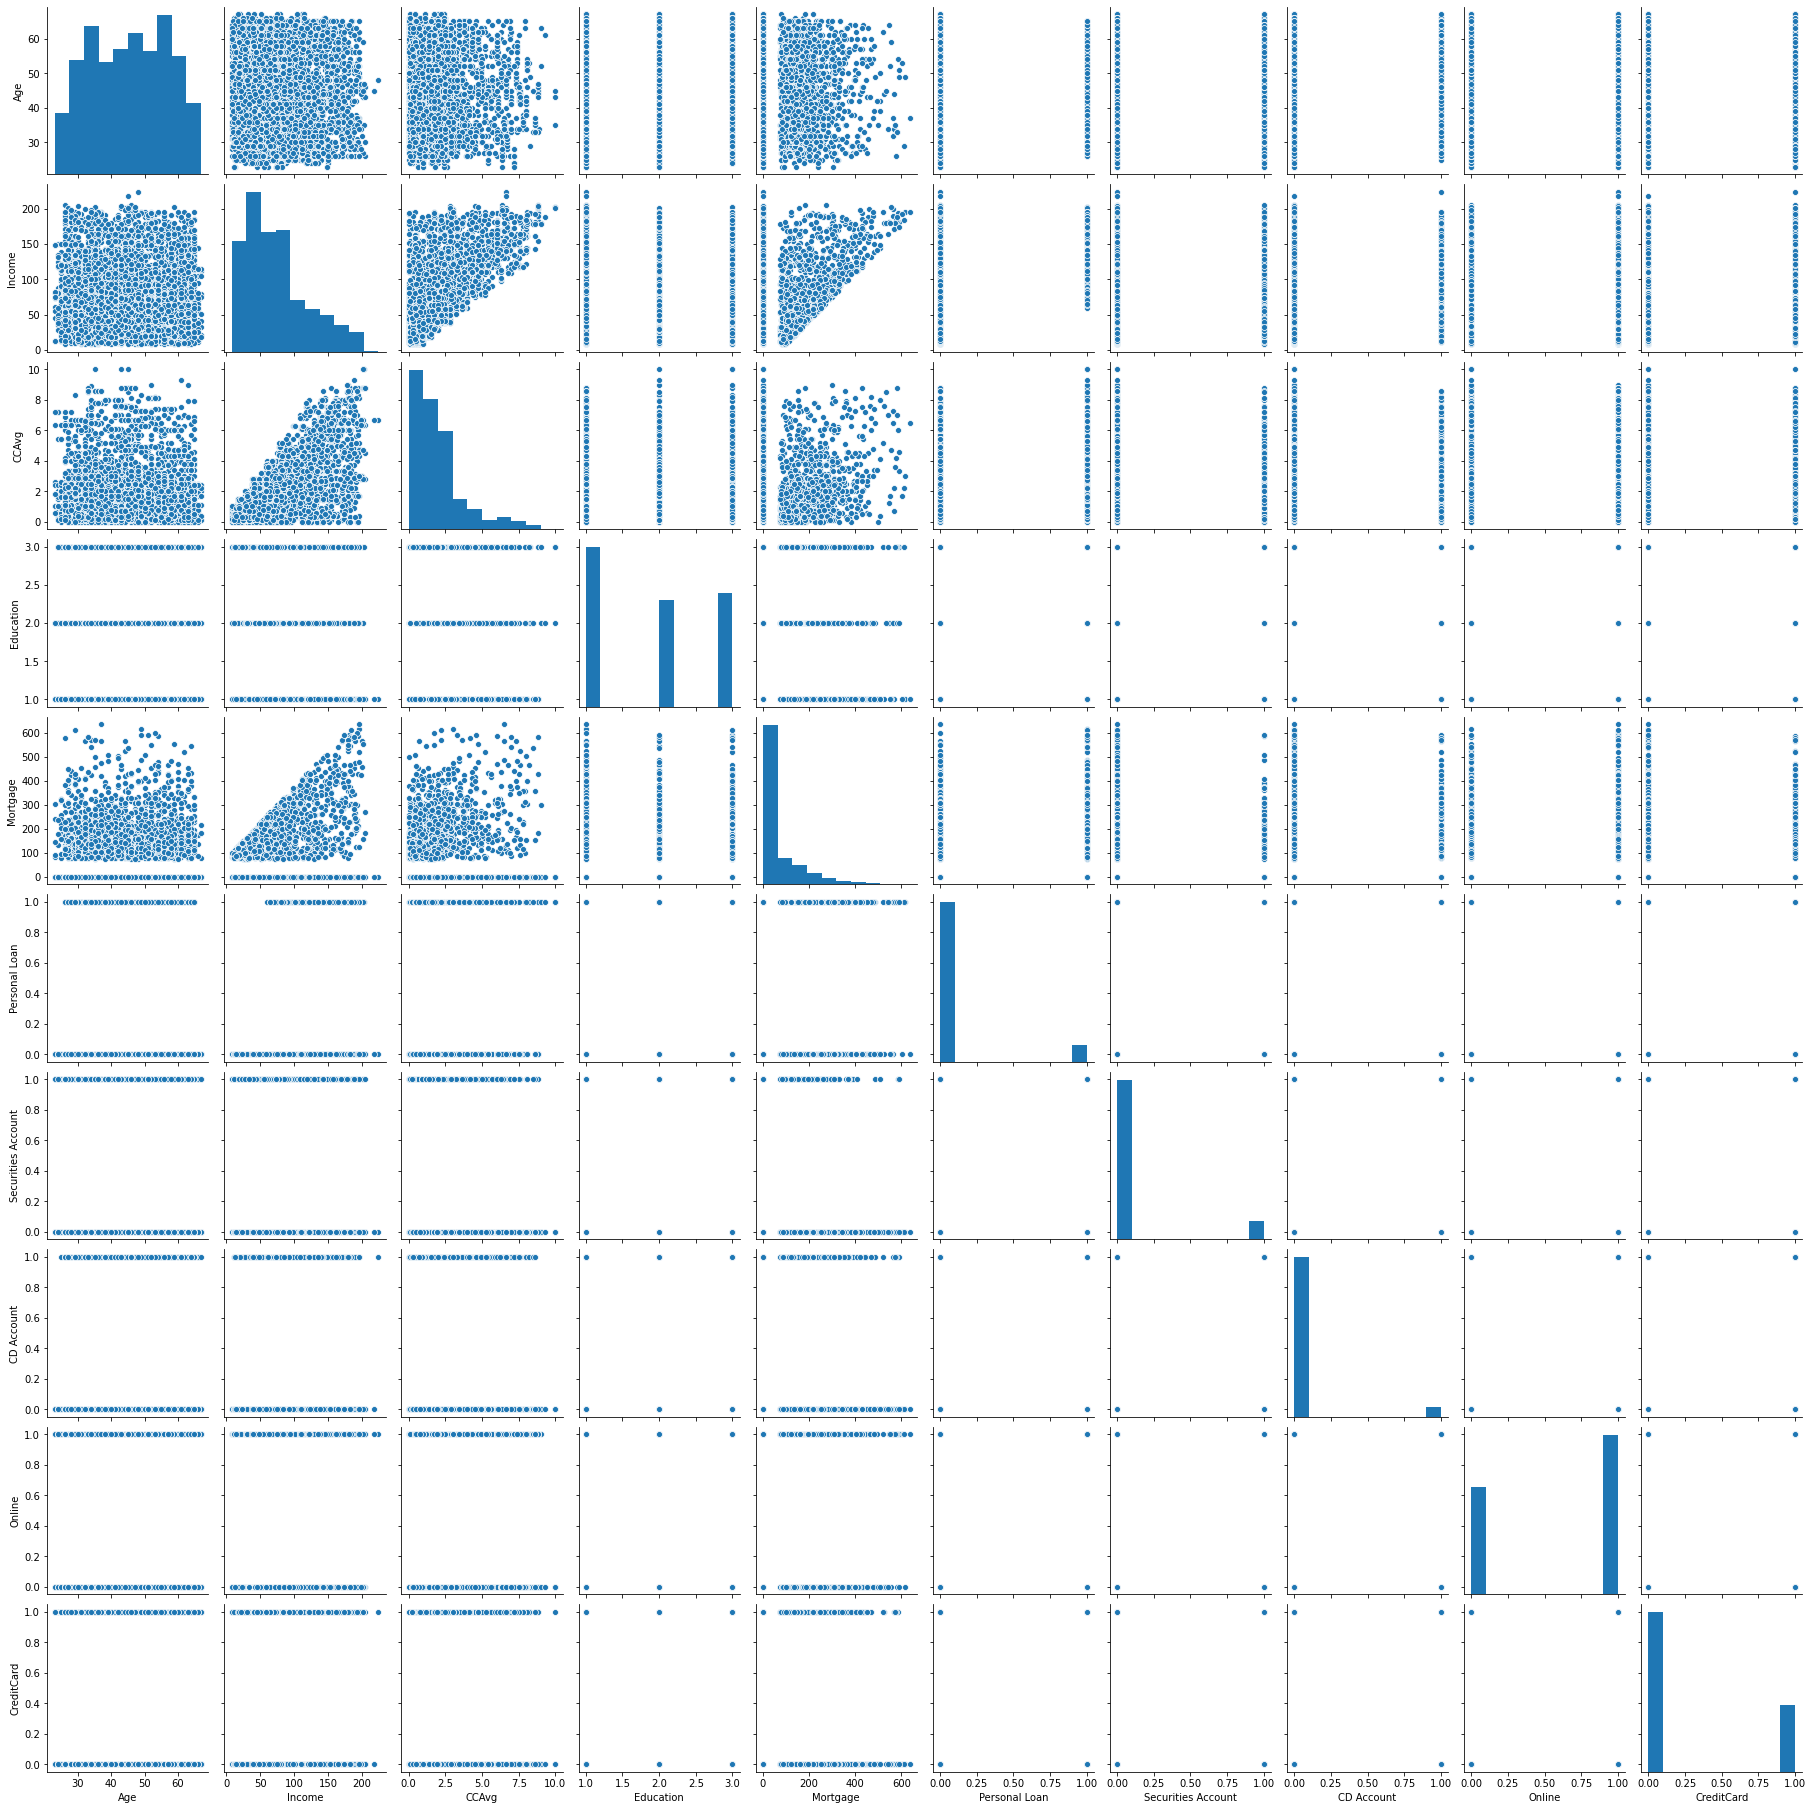

In [98]:
#using pairplot to find pairwise relationship between different parameters

sns.pairplot(data)

In [99]:
data.head()

,Age,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,1.6,1,0,0,1,0,0,0
1,45,34,1.5,1,0,0,1,0,0,0
2,39,11,1.0,1,0,0,0,0,0,0
3,35,100,2.7,2,0,0,0,0,0,0
4,35,45,1.0,2,0,0,0,0,0,1


In [100]:
#setting target variable
x = data.iloc[:,data.columns!='Personal Loan']
y = data.iloc[:,5:6]
y



,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


**STEP 4:Transformations**

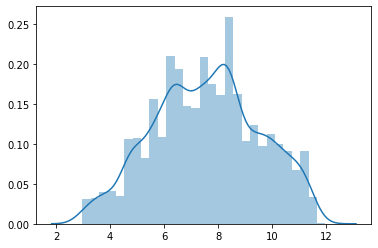

In [101]:
#import the necessary module from the library
from sklearn.preprocessing import PowerTransformer
#transforming data using yeo-johnson method
trnsfrm=  PowerTransformer(method="yeo-johnson", standardize=False)
trnsfrm.fit(data["Income"].values.reshape(-1,1))
tmp=trnsfrm.transform(data["Income"].values.reshape(-1,1))
sns.distplot(tmp)



In [102]:
data['Income']=tmp
data.head()

,Age,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,1.6,1,0,0,1,0,0,0
1,45,5.876952,1.5,1,0,0,1,0,0,0
2,39,3.504287,1.0,1,0,0,0,0,0,0
3,35,8.983393,2.7,2,0,0,0,0,0,0
4,35,6.597314,1.0,2,0,0,0,0,0,1


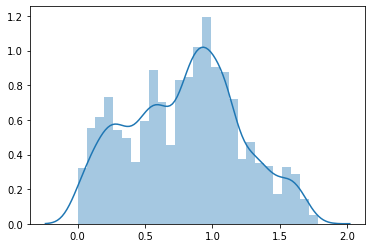

In [103]:
from sklearn.preprocessing import PowerTransformer
#transforming data using yeo-johnson method
trnsfrm=  PowerTransformer(method="yeo-johnson", standardize=False)
trnsfrm.fit(data["CCAvg"].values.reshape(-1,1))
tempor=trnsfrm.transform(data["CCAvg"].values.reshape(-1,1))
sns.distplot(tempor)

In [104]:
#for comapring
data.head()

,Age,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,1.6,1,0,0,1,0,0,0
1,45,5.876952,1.5,1,0,0,1,0,0,0
2,39,3.504287,1.0,1,0,0,0,0,0,0
3,35,8.983393,2.7,2,0,0,0,0,0,0
4,35,6.597314,1.0,2,0,0,0,0,0,1


In [106]:
data['CCAvg']=tempor
data.head()

,Age,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,0.845150,1,0,0,1,0,0,0
1,45,5.876952,0.814468,1,0,0,1,0,0,0
2,39,3.504287,0.633771,1,0,0,0,0,0,0
3,35,8.983393,1.107409,2,0,0,0,0,0,0
4,35,6.597314,0.633771,2,0,0,0,0,0,1


In [107]:
#using binning method for mortgage column
data["Mortgage_new"]=pd.cut(data["Mortgage"], bins=[0,100,200,300,400,500,600,700], labels=[0,1,2,3,4,5,6], include_lowest= True)
data.drop("Mortgage", axis=1, inplace= True)
data.head()


,Age,Income,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_new
0,25,6.827583,0.845150,1,0,1,0,0,0,0
1,45,5.876952,0.814468,1,0,1,0,0,0,0
2,39,3.504287,0.633771,1,0,0,0,0,0,0
3,35,8.983393,1.107409,2,0,0,0,0,0,0
4,35,6.597314,0.633771,2,0,0,0,0,1,0


**STEP 5: Normalising data**
**The preprocessing module is imported from sklearn.**
**The distplot of Income was seen to be skewed to the right. Hence normalisation**  **is a preprocessing method that helps convert non normalised data to a normalised one.** 

In [108]:
#normalising data using min-max scaler
x = data[['CCAvg']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_normalized = pd.DataFrame(x_scaled)
data_normalized.head()
data.CCAvg=data_normalized
data.head()



,Age,Income,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_new
0,25,6.827583,0.474877,1,0,1,0,0,0,0
1,45,5.876952,0.457638,1,0,1,0,0,0,0
2,39,3.504287,0.356107,1,0,0,0,0,0,0
3,35,8.983393,0.622236,2,0,0,0,0,0,0
4,35,6.597314,0.356107,2,0,0,0,0,1,0


In [109]:
x = data[['Income']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_normalizedd = pd.DataFrame(x_scaled)
data_normalizedd.head()
data.Income=data_normalizedd
data.head()


,Age,Income,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_new
0,25,0.428162,0.474877,1,0,1,0,0,0,0
1,45,0.322585,0.457638,1,0,1,0,0,0,0
2,39,0.059077,0.356107,1,0,0,0,0,0,0
3,35,0.667587,0.622236,2,0,0,0,0,0,0
4,35,0.402589,0.356107,2,0,0,0,0,1,0


In [110]:
x = data[['Mortgage_new']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_normalized = pd.DataFrame(x_scaled)
data_normalized.head()
data.Mortgage_new=data_normalized
data.head()


,Age,Income,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_new
0,25,0.428162,0.474877,1,0,1,0,0,0,0.0
1,45,0.322585,0.457638,1,0,1,0,0,0,0.0
2,39,0.059077,0.356107,1,0,0,0,0,0,0.0
3,35,0.667587,0.622236,2,0,0,0,0,0,0.0
4,35,0.402589,0.356107,2,0,0,0,0,1,0.0


In [111]:
#setting target variable
x = data.iloc[:,data.columns!='Personal Loan']
y = data.iloc[:,4:5]
y


,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


**Splitting data into train and test model**

In [112]:
from sklearn.model_selection import train_test_split
#splitting data in the ration 70:30
train_x,test_x,train_y,test_y =train_test_split(x,y,test_size = 0.3, stratify=y,random_state=0)
print(len(train_x))
print(len(test_x))

3500
1500


**Stratification is used to return training and test subsets that have the same proportions of class labels as the in**put dataset.

In [113]:
#applying logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(random_state=0)
logmodel.fit(train_x,train_y)
predictions = logmodel.predict(test_x)
print("The predictions for the test set are",predictions)

The predictions for the test set are [1 0 0 ... 0 0 0]


**Metrics**

Different metrics are used for predicting the model's preformance.
Logloss, confusiion matrix, Cross validation score, roc curve are used to measure model's performance.

In [114]:
#checking accuracy of testing data
score = logmodel.score(test_x, test_y)
print(score)

0.95


In [115]:
#checking accuracy of training data
score = logmodel.score(train_x, train_y)
print(score)

0.9531428571428572


In [116]:
test_y.shape

(1500, 1)

In [117]:
#finding logloss
from sklearn import model_selection
results = model_selection.cross_val_score(logmodel, test_x, test_y, scoring='neg_log_loss')
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.151 (0.011)


In [118]:
#finding accuracy
results = model_selection.cross_val_score(logmodel, test_x, test_y, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.944 (0.006)


In [119]:
#finding roc
results = model_selection.cross_val_score(logmodel, test_x, test_y, scoring='roc_auc')
print("roc auc: %.3f (%.3f)" % (results.mean(), results.std()))

roc auc: 0.954 (0.013)


In [120]:
#printing classification report
from sklearn.metrics import classification_report
cr=classification_report(test_y, predictions )
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.88      0.56      0.68       144

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.95      0.95      0.94      1500



Confusion matrix is a matrix used to find the accuracy of the prediction. To find the accuracy we divide the summation of principal diagonal elements and the summation of all the elements of the matrix

In [121]:
#printing confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix((test_y), predictions)
print(matrix)

[[1345   11]
 [  64   80]]


In [30]:
#function for 
#from sklearn.metrics import confusion_matrix
#def cmd(actual,predicted):
 # cm=confusion_matrix(actual,predicted)
  #sns.heatmap(cm,annot=True,fmt='2f',xticklabels=[0,1],yticklabels=[0,1])
  #plt.ylabel('Actual')
  #plt.xlabel('Predicted')
  #plt.show

None


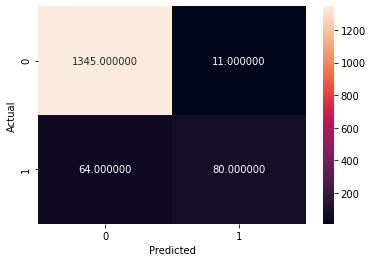

In [31]:
#print(cmd((test_y),predictions.reshape(-1,1)))

<function matplotlib.pyplot.show>

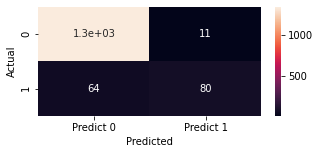

In [122]:
#confusion matrix as heatmap
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, predictions)

data_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (5,2))
sns.heatmap(data_cm, annot=True)

#giving label names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show

The confusion matrix

True Positives (TP): we correctly predicted people with Personal Loan: 80

True Negatives (TN): we correctly predicted people without Personal Loan: 1345

False Positives (FP): we incorrectly predicted people who have Personal Loan  : 11 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people who do not have Personal Loan : **64 Falsely predict** negative Type II error 

**STEP 8: DIFFERENT MODELS**

Other algorithms include KNN, Decision tree, Random forest etc

**K nearest neighbour**: KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.
In our data our output is either 0 or 1. So this is just binary classification. 

In [123]:
from sklearn.neighbors import KNeighborsClassifier
 #Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [124]:
predlabelKNN = NNH.predict(test_x)
predlabelKNN

array([1, 0, 0, ..., 0, 0, 0])

In [125]:
NNH.score(test_x,test_y)

0.9153333333333333

In [126]:
NNH.score(train_x,train_y)

0.9265714285714286

In [128]:
#finding accuracy
results = model_selection.cross_val_score(NNH, test_x, test_y, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.905 (0.003)


In [129]:
#finding roc auc
results = model_selection.cross_val_score(NNH, test_x, test_y, scoring='roc_auc')
print("roc auc: %.3f (%.3f)" % (results.mean(), results.std()))

roc auc: 0.717 (0.051)


In [130]:
#classification report
from sklearn.metrics import classification_report
cr=classification_report(test_y, predlabelKNN )
print(cr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       0.87      0.14      0.24       144

    accuracy                           0.92      1500
   macro avg       0.89      0.57      0.60      1500
weighted avg       0.91      0.92      0.89      1500



In [131]:
#confusion matrix
matrix1 = confusion_matrix((test_y), predlabelKNN)
print(matrix1)

[[1353    3]
 [ 124   20]]


<function matplotlib.pyplot.show>

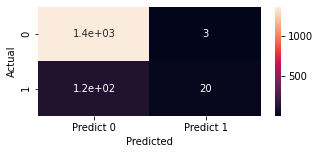

In [132]:
#heatmap of confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, predlabelKNN)

data_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (5,2))
sns.heatmap(data_cm, annot=True)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show

The confusion matrix

True Positives (TP): we correctly predicted people with Personal Loan: 20

True Negatives (TN): we correctly predicted people without Personal Loan: 1353

False Positives (FP): we incorrectly predicted people who have Personal Loan  : 3 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people who do not have Personal Loan : **124 Falsely predict negative** Type II error 

**RandomForestClassifier**: It is the combination of many decision trees.

In [133]:
#importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(n_estimators=500,max_depth=8, random_state=0)
randomforest_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [134]:
predicted_random=randomforest_model.predict(test_x)
randomforest_model.score(test_x,test_y)

0.9733333333333334

In [135]:
randomforest_model.score(train_x,train_y)

0.9848571428571429

In [136]:
#finding accuracy
results = model_selection.cross_val_score(randomforest_model, test_x, test_y, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.967 (0.008)


In [137]:
#finding roc
results = model_selection.cross_val_score(randomforest_model, test_x, test_y, scoring='roc_auc')
print("roc auc: %.3f (%.3f)" % (results.mean(), results.std()))

roc auc: 0.982 (0.006)


In [138]:
#classification report
from sklearn.metrics import classification_report
cr=classification_report(test_y, predicted_random )
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.93      0.78      0.85       144

    accuracy                           0.97      1500
   macro avg       0.95      0.89      0.92      1500
weighted avg       0.97      0.97      0.97      1500



In [140]:
#printing confusion matrix
matrix2 = confusion_matrix((test_y),predicted_random )
print(matrix2)

[[1347    9]
 [  31  113]]


<function matplotlib.pyplot.show>

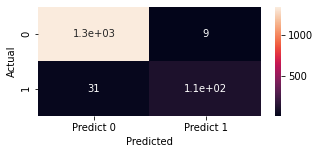

In [141]:
#confusion matrix as heatmap
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, predicted_random)

data_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (5,2))
sns.heatmap(data_cm, annot=True)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show

The confusion matrix

True Positives (TP): we correctly predicted people with Personal Loan: 113

True Negatives (TN): we correctly predicted people without Personal Loan: 1347

False Positives (FP): we incorrectly predicted people who have Personal Loan  : 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people who do not have Personal Loan : **31 Falsely predict negative** Type II error 

**A decision tree** is a graphical representation of all the possible solutions to a decision based on certain conditions. 

In [142]:
#Importing decision tree classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [143]:
dt_model.score(test_x , test_y)

0.97

In [144]:
dt_model.score(train_x , train_y)

0.9654285714285714

In [145]:
predicted=dt_model.predict(test_x)

In [61]:
#finding accuracy
results = model_selection.cross_val_score(dt_model, test_x, test_y, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.969 (0.007)


In [146]:
#finding roc
results = model_selection.cross_val_score(dt_model, test_x, test_y, scoring='roc_auc')
print("roc auc: %.3f (%.3f)" % (results.mean(), results.std()))

roc auc: 0.977 (0.013)


In [147]:
#printing classification report
from sklearn.metrics import classification_report
cr=classification_report(test_y, predicted )
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       1.00      0.69      0.81       144

    accuracy                           0.97      1500
   macro avg       0.98      0.84      0.90      1500
weighted avg       0.97      0.97      0.97      1500



In [148]:
#printing confusion matrix
matrix3 = confusion_matrix((test_y),predicted )
print(matrix3)

[[1356    0]
 [  45   99]]


<function matplotlib.pyplot.show>

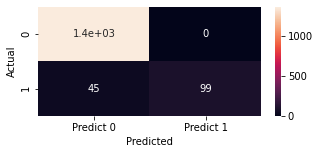

In [149]:
#heatmap of corresponding confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, predicted)

data_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (5,2))
sns.heatmap(data_cm, annot=True)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show

The confusion matrix

True Positives (TP): we correctly predicted people with Personal Loan: 99

True Negatives (TN): we correctly predicted people without Personal Loan: 1356

False Positives (FP): we incorrectly predicted people who have Personal Loan  : 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people who do not have Personal Loan : **45 Falsely predict negative** Type II error 

**CONCLUSION**:(step 9)

**STEP 1**: 
  Importing the necessary file and the datasets and libraries.
 Checkeing for statistical summary for understanding.


> 


  **Step 2**: 
  Cleaning data after checking for null values and none were found. It found out that the experience column had a negative value.Also a strong correlation between age and experience columns allowed us to drop the experience column.
  The family column was dropped as it did not have any effect on the target column-Personal Loan.

> 

**STEP 3:**
   Plotted graphs in order to understand the relation between various columns.
   It was found out that mortgage column was highly skewed and the CCAvg and Income columns were right skewed.

> 


  **STEP 4:**
   Necessary transformations were made. It was found that the YEO JOHNSON method was effective.BINNING helped us transform mortgage column.These methods helped us bring skeweness to graph and hence data.

> 


  **STEP 5**:
  The data was normalised.Here MIN-MAX-SCALER was used as it gave better results compared to standard scaler.The data was split in the ratio 70:30.Stratifies split was used to maintain proportion and random state was set to zero.

>


**STEP 6**:
 Logistic Regression model was used and corresponding accuracy,roc was found

> 


**STEP 7:**
 Looking into metrics.

---------------------------

LOGISTIC REGRESSION:

ACCURACY = 0.944

  PRECISION = 0.954

    CONFUSION MATRIX = [[1345   11]
                        [  63   81]]
--------------------------

 KNN :

 ACCURACY = 0.905

   PRECISION = 0.717

     CONFUSION MATRIX = [[1353    3]
                         [ 125   19]]  

--------------------------------                        

RANDOM FOREST:

ACCURACY = 0.973

PRECISION = 0.984

    CONFUSION MATRIX = [[1347    9]
                        [  31  113]]

 --------------------------

 DECISION TREE:

 ACCURACY = 0.971

 PRECISION = 0.977

    CONFUSION MATRIX = [[1356    0]
                        [  45   99]]       

 -----------------------------                                       


**STEP 9**:

# Looking into all models, the **RANDOM FOREST** provides an Accuracy of 97.3% and an ROC AUC of 0.982. Also from its confusion matrix, the **false negative predictions** of those who have taken loan is **31**,lesser than any other model.Hence this has to be the best suited model compared to others.Although the decision tree model gave us an equal approach in accuracy and recall,the number of false predictions was 45.

# Our major aim is to provide a Machine learning model that predicts maximum number of true cases and reduce false predictions, answering the query put forward to it.

# Hence the best suited real time model for our problem statement is RANDOM FOREST MODEL.


